In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# Зчитуємо дані з вказаного URL
url = "https://uk.wikipedia.org/wiki/%D0%A1%D0%B5%D1%80%D0%B5%D0%B4%D0%BD%D1%8F_%D0%B7%D0%B0%D1%80%D0%BE%D0%B1%D1%96%D1%82%D0%BD%D0%B0_%D0%BF%D0%BB%D0%B0%D1%82%D0%B0_%D0%B2_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D1%96"

# Зчитуємо таблицю в DataFrame
df = pd.read_html(url, header=0)[2]  # Обираємо другий елемент списку, де знаходиться таблиця

df.head(5)


,Рік,В національній валюті,В доларах США,Кількість кг хліба[20] на середню зарплату,Кількість БігМаків на середню зарплату
0,1992,"5832,88▲","28,04▼","1015,67▲",—
1,1993,163533▲,"36,03▲","430,42▼",—
2,1994,1426343▲,"44,99▲","372,76▼",—
3,1995,7304000▲,"49,53▲","201,76▼",—
4,1996,"125,23▼","68,45▲","198,62▼",—


In [2]:
#Підготовка і аналіз даних
# Визначаємо загальну кількість років та місяців у даних
num_years = len(df['Рік']) - 1  # віднімання 1, оскільки перший стовпець - назва

print("Загальна кількість років =", num_years)


Загальна кількість років = 31


In [3]:
#Визначити кількість рядків і стовпчиків 

num_rows, num_columns = df.shape
print(f"Кількість рядків: {num_rows}, Кількість стовпчиків: {num_columns}")

Кількість рядків: 32, Кількість стовпчиків: 5


In [4]:
#Визначити тип даних
df.dtypes

Рік                                            int64
В національній валюті                         object
В доларах США                                 object
Кількість кг хліба[20] на середню зарплату    object
Кількість БігМаків на середню зарплату        object
dtype: object

In [5]:
#Замінити в таблиці "—" на значення  NaN
#Також заміню назви стовпців на зручні
df = df.rename(columns={
    "Рік": "Year",
    "В національній валюті": "Salary in UAH",
    "В доларах США": "Salary in USD",
    "Кількість кг хліба[20] на середню зарплату": "Bread per Salary",
    "Кількість БігМаків на середню зарплату": "BigMacs per Salary"
})
df.replace(["—", "н.д."], np.nan, inplace = True)
df

,Year,Salary in UAH,Salary in USD,Bread per Salary,BigMacs per Salary
0,1992,"5832,88▲","28,04▼","1015,67▲",NaN
1,1993,163533▲,"36,03▲","430,42▼",NaN
2,1994,1426343▲,"44,99▲","372,76▼",NaN
3,1995,7304000▲,"49,53▲","201,76▼",NaN
4,1996,"125,23▼","68,45▲","198,62▼",NaN
5,1997,"143,09▲","76,86▲","211,13▲",20[21]
6,1998,"152,83▲","62,39▼","177,69▼",NaN
7,1999,"177,39▲","42,95▼","180,68▲",24▲[22]
8,2000,"231,04▲","42,47▼","117,51▼",NaN
9,2001,"311,62▲","58,01▲","153,57▲",50▲[23]


In [6]:
# Прибрати символи '▲' та '▼' у всіх стовпцях 
df = df.replace({'▲': '', '▼': ''}, regex=True)
df

,Year,Salary in UAH,Salary in USD,Bread per Salary,BigMacs per Salary
0,1992,"5832,88","28,04","1015,67",NaN
1,1993,163533,"36,03","430,42",NaN
2,1994,1426343,"44,99","372,76",NaN
3,1995,7304000,"49,53","201,76",NaN
4,1996,"125,23","68,45","198,62",NaN
5,1997,"143,09","76,86","211,13",20[21]
6,1998,"152,83","62,39","177,69",NaN
7,1999,"177,39","42,95","180,68",24[22]
8,2000,"231,04","42,47","117,51",NaN
9,2001,"311,62","58,01","153,57",50[23]


In [7]:
#Прибрати текст у квадратних дужках  всіх стовпцях
#Використання регулярного виразу r'\[.*?\]' вказує на пошук будь-якого тексту,
#що знаходиться між квадратними дужками [ ]. 
df = df.replace(r'\[.*?\]', '', regex=True)
df


,Year,Salary in UAH,Salary in USD,Bread per Salary,BigMacs per Salary
0,1992,"5832,88","28,04","1015,67",NaN
1,1993,163533,"36,03","430,42",NaN
2,1994,1426343,"44,99","372,76",NaN
3,1995,7304000,"49,53","201,76",NaN
4,1996,"125,23","68,45","198,62",NaN
5,1997,"143,09","76,86","211,13",20
6,1998,"152,83","62,39","177,69",NaN
7,1999,"177,39","42,95","180,68",24
8,2000,"231,04","42,47","117,51",NaN
9,2001,"311,62","58,01","153,57",50


In [8]:
# Заміна ком на крапки та перетворення на числовий тип для всіх стовпців
df = df.replace(',', '.', regex=True).astype(float)

# Заповнення NaN середнім значенням стовпця
df.fillna(df.mean(), inplace=True)

df.head(5)

,Year,Salary in UAH,Salary in USD,Bread per Salary,BigMacs per Salary
0,1992.0,5832.88,28.04,1015.67,139.272727
1,1993.0,163533.00,36.03,430.42,139.272727
2,1994.0,1426343.00,44.99,372.76,139.272727
3,1995.0,7304000.00,49.53,201.76,139.272727
4,1996.0,125.23,68.45,198.62,139.272727


In [9]:
#Ще раз перевіримо тип стовпців
df.dtypes

Year                  float64
Salary in UAH         float64
Salary in USD         float64
Bread per Salary      float64
BigMacs per Salary    float64
dtype: object

In [10]:
#Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)
df.isnull().sum() / len(df)

Year                  0.0
Salary in UAH         0.0
Salary in USD         0.0
Bread per Salary      0.0
BigMacs per Salary    0.0
dtype: float64

In [11]:
df.describe()

,Year,Salary in UAH,Salary in USD,Bread per Salary,BigMacs per Salary
count,32.000000,3.200000e+01,32.000000,32.000000,32.000000
mean,2007.500000,2.818016e+05,214.115937,425.556875,139.272727
std,9.380832,1.305937e+06,151.907302,190.788939,44.261818
min,1992.000000,1.252300e+02,28.040000,117.510000,20.000000
25%,1999.750000,5.585425e+02,66.935000,260.505000,135.250000
50%,2007.500000,2.835545e+03,204.765000,460.675000,139.272727
75%,2015.250000,9.276435e+03,334.287500,533.337500,161.750000
max,2023.000000,7.304000e+06,514.410000,1015.670000,216.000000


In [12]:
# кореляції
df.corr()

,Year,Salary in UAH,Salary in USD,Bread per Salary,BigMacs per Salary
Year,1.000000,-0.294353,0.894302,0.399747,0.528931
Salary in UAH,-0.294353,1.000000,-0.236591,-0.219579,0.001801
Salary in USD,0.894302,-0.236591,1.000000,0.541399,0.659372
Bread per Salary,0.399747,-0.219579,0.541399,1.000000,0.561472
BigMacs per Salary,0.528931,0.001801,0.659372,0.561472,1.000000


<AxesSubplot:>

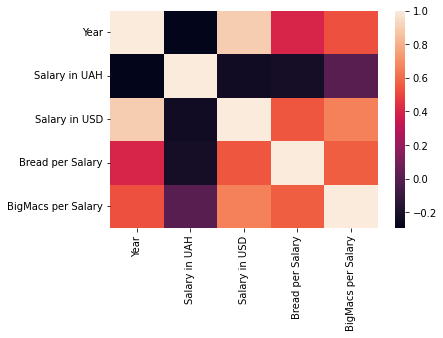

In [13]:
sns.heatmap(df.corr())

In [14]:
#Дані підготовлені, можна виконувати завдання.
#Завдання. Для років від 2000 вивести саме ті роки, саме ті роки, коли зп була більше 4000 грн і менше 7000 грн
years = df[(df['Year'] >= 2000) & (df['Salary in UAH'] > 4000) & (df['Salary in UAH'] < 7000)]
print(years)


      Year  Salary in UAH  Salary in USD  Bread per Salary  BigMacs per Salary
23  2015.0        4207.33         162.60            517.22               124.0
24  2016.0        5187.33         203.02            441.05               133.0


In [15]:
# Видаліть  останній рядок
df = df.iloc[:-1]
df.tail(3)

,Year,Salary in UAH,Salary in USD,Bread per Salary,BigMacs per Salary
28,2020.0,11596.6,430.21,549.08,187.000000
29,2021.0,14017.8,514.41,560.03,216.000000
30,2022.0,14857.0,371.00,479.00,139.272727


In [16]:

#Відфільтрувати дані за зростанням у стовпці та вивести перший, останній та третій рядки

# Сортуємо DataFrame за зростанням у відповідному стовпці
sorted_df = df.sort_values(by='Year')
sorted_df

,Year,Salary in UAH,Salary in USD,Bread per Salary,BigMacs per Salary
0,1992.0,5832.88,28.04,1015.67,139.272727
1,1993.0,163533.00,36.03,430.42,139.272727
2,1994.0,1426343.00,44.99,372.76,139.272727
3,1995.0,7304000.00,49.53,201.76,139.272727
4,1996.0,125.23,68.45,198.62,139.272727
5,1997.0,143.09,76.86,211.13,20.000000
6,1998.0,152.83,62.39,177.69,139.272727
7,1999.0,177.39,42.95,180.68,24.000000
8,2000.0,231.04,42.47,117.51,139.272727
9,2001.0,311.62,58.01,153.57,50.000000


In [17]:
# Вибираємо перший, останній і третій рядки
first_row = sorted_df.iloc[0]
last_row = sorted_df.iloc[-1]
third_row = sorted_df.iloc[2]

# Виводимо результат
print("Перший рядок:")
print(first_row)
print("\nОстанній рядок:")
print(last_row)
print("\nТретій рядок:")
print(third_row)



Перший рядок:
Year                  1992.000000
Salary in UAH         5832.880000
Salary in USD           28.040000
Bread per Salary      1015.670000
BigMacs per Salary     139.272727
Name: 0, dtype: float64

Останній рядок:
Year                   2022.000000
Salary in UAH         14857.000000
Salary in USD           371.000000
Bread per Salary        479.000000
BigMacs per Salary      139.272727
Name: 30, dtype: float64

Третій рядок:
Year                  1.994000e+03
Salary in UAH         1.426343e+06
Salary in USD         4.499000e+01
Bread per Salary      3.727600e+02
BigMacs per Salary    1.392727e+02
Name: 2, dtype: float64


In [18]:
# Видаляємо два останні стовпчики
df = df.drop(df.columns[-2:], axis=1)
df


,Year,Salary in UAH,Salary in USD
0,1992.0,5832.88,28.04
1,1993.0,163533.00,36.03
2,1994.0,1426343.00,44.99
3,1995.0,7304000.00,49.53
4,1996.0,125.23,68.45
5,1997.0,143.09,76.86
6,1998.0,152.83,62.39
7,1999.0,177.39,42.95
8,2000.0,231.04,42.47
9,2001.0,311.62,58.01


In [1]:
#Завдання. Створити нову таблицю, що містить мін, макс зп
# Обчислення максимальних та мінімальних значень
max_values = _.max()
min_values =_.min()

# Створення нового DataFrame з максимальними та мінімальними значеннями
new_df = pd.DataFrame({
    "max": max_values,
    "min": min_values
})

new_df

AttributeError: 'str' object has no attribute 'max'